In [ ]:
from fastai import *
from fastai.vision import *

In [40]:
folder = 'jackson'
file = 'download.csv'

In [49]:
folder = 'jordan'
file = 'download.csv'

In [31]:
folder = 'phelps'
file = 'download.csv'

In [50]:
path = Path('../../data/michael/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [51]:
classes = ['jackson','jordan','phelps']

In [52]:
download_images(path/folder/file, dest, max_pics=200)

Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/rf/image_960w/2010-2019/Wires/Images/2016-11-30/AP/Cavaliers_Bucks_Basketball-0b407.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/rs4myIBWBxcmHTHm9WgrJYYbHUE=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/LGDQMQWGYEI6RHAPF75PNVBCVI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/rf/image_480w/2010-2019/WashingtonPost/2016/08/08/Style/Images/AP_718270668652-2728.jpg?uuid=ru9dTl2iEeadL7GjVkGBoQ HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/early-lead/files/2017/02/0mj0207.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read t

In [53]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

jackson


jordan


Image ../../data/michael/jordan/00000067.png has 1 instead of 3
cannot identify image file <_io.BufferedReader name='../../data/michael/jordan/00000173.jpg'>
cannot identify image file <_io.BufferedReader name='../../data/michael/jordan/00000059.jpg'>
cannot identify image file <_io.BufferedReader name='../../data/michael/jordan/00000125.png'>
cannot identify image file <_io.BufferedReader name='../../data/michael/jordan/00000184.jpg'>
cannot identify image file <_io.BufferedReader name='../../data/michael/jordan/00000045.jpg'>
phelps


In [54]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [55]:
data.classes

['jackson', 'jordan', 'phelps']

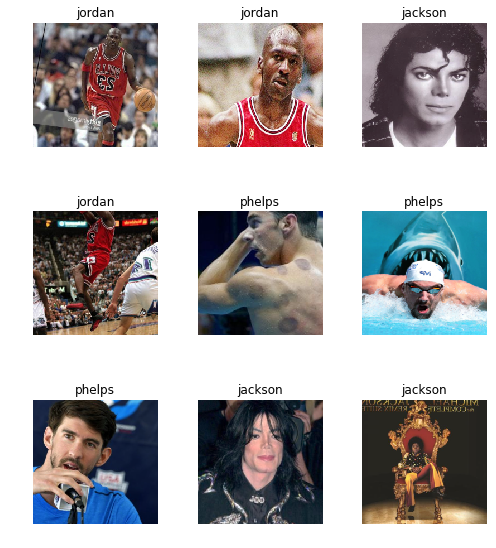

In [56]:
data.show_batch(rows=3, figsize=(7,8))

In [57]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [58]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.221031,0.631448,0.226891
2,0.843812,0.426000,0.109244
3,0.653008,0.412331,0.117647
4,0.543161,0.409668,0.117647


In [59]:
learn.save('stage-1')

In [60]:
learn.unfreeze()

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


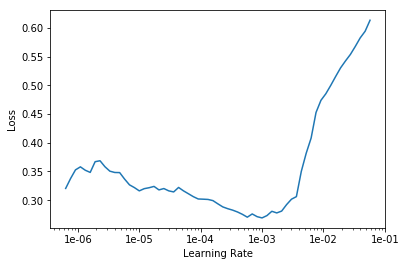

In [62]:
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.328212,0.427703,0.109244
2,0.287395,0.458135,0.117647


In [64]:
learn.save('stage-2')

In [65]:
learn.load('stage-2');

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

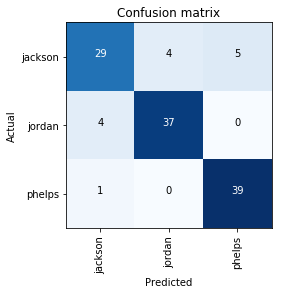

In [67]:
interp.plot_confusion_matrix()

In [68]:
from fastai.widgets import *

In [70]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

TypeError: get_toplosses_idxs() got multiple values for argument 'ds_type'